# Growth Of Saudi Arabia Air Passengers 

Number of passengers and their movements between airports counts as performance indicator of the development of a specific region, and the new factors that happend. The numbers in the past years could tell a lot, as the percentage of increase reflects new opportunities, growth, and development.  Saudi Arabia is the land of the two Holy Mosques which positions the Kingdom at the heart of the Arab and Islamic worlds, so number of passengers expected to increase in specific months, therefore airports are the first and last impression and since the announcement of vision 2030 in 2016, new projects lunched to meet the goals of this vision, each of these projects will open new areas of economic activity, create jobs and drive economic development, and this will result in the growth of passengers and enhancing airports services. This project will include only the international airports, Plus AlUal airport and Neom airport. The reason is my assumption of air passengers growth, within the cities of where every airport is located.

### Research Question  

<ul>
<li><code>What are the main factors that are driving the changes on number of air passengers in Saudi Arabia?</code></li><br>
<li><code>Along with passengers journey inside the airports, what success achievements the Saudi airports earned?</code></li>
</ul>

 ### Datasets
 
**1.Flights data**

<li><i>Year</i>:    <i>from 2010 - 2021</i></li>
<li><i>Airport</i>: <i>airports code</i></li>
<li><i>FlightsA-Domestic</i>: <i>arrival of domestic flights</i></li>
<li><i>PaxA-Domestic</i>: <i>arrival of domestic passengers </i></li>
<li><i>FlightsD-Domestic</i>: <i>departure of domestic flights</i></li>
<li><i>PaxD-Domestic</i>: <i>departure of domestic passengers</i></li>
<li><i>FlightsA-international</i>: <i>arrival of international flights</i></li>
<li><i>PaxA-international</i>: <i>farrival of international passengers</i></li>
<li><i>FlightsD-international</i>: <i>departure of international flights</i></li>
<li><i>PaxD-international</i>: <i>departure of international flights</i></li>
<li><i>Flights</i>: <i>total of flights</i></li>
<li><i>Pax</i>: <i>total of passengers</i></li>




**2.Passengers Monthly data**

<ul>
<li><i>Year</i>:    <i>From 2015 - 2022 (Jan, Feb) </i></li>
<li><i>Month_short</i>: <i>Months, Jan> January, ..</i></li>
<li><i>dom/intl</i>: <i>Domestic/International</i></li>
<li><i>unique 3-letter code </i></li>


</ul>


<i>Sourece: [GACA](https://gaca.gov.sa/)</i>

## 1. Exploratory Data Analysis

In this first section of this project, i will make a cursory investigation about the data i have. Being familiar with the data through an explorative process is a fundamental practice to help better understand and justify the information.

This project will consists of number of datasets:<br>
1- Flights data<br>
2- Passengers per month data<br>
3- International airports growth<br>



### 1.1 Data cleaning

In [1]:
# import needed packages to start using data  
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

#### 1.1.1 Read and show flight dataset 


In [2]:
flights=pd.read_csv('FlightsData2.csv') 

In [3]:
flights.head()

,Unnamed: 0,Year,Airport,FlightsA-Domestic,PaxA-Domestic,CargoA-Domestic,FlightsD-Domestic,PaxD-Domestic,CargoD-Domestic,FlightsA-international,PaxA-international,CargoA-international,FlightsD-international,PaxD-international,CargoD-international,Flights,Pax,Cargo
0,0,2010,ABT,1179.0,112685.0,51.0,1179.0,118292.0,9.0,NaN,NaN,NaN,1.0,7.0,0.0,2359.0,230984.0,60.0
1,1,2010,AHB,6234.0,692309.0,2264.0,6191.0,705831.0,924.0,250.0,20655.0,13.0,241.0,18452.0,9.0,12916.0,1437247.0,3210.0
2,2,2010,AJF,1771.0,136865.0,534.0,1764.0,141194.0,56.0,1.0,0.0,0.0,NaN,NaN,NaN,3536.0,278059.0,590.0
3,3,2010,AQI,543.0,30006.0,32.0,542.0,28674.0,64.0,NaN,NaN,NaN,1.0,0.0,0.0,1086.0,58680.0,96.0
4,4,2010,BHH,1387.0,115415.0,55.0,1386.0,122263.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2773.0,237678.0,70.0


In [4]:
# i will limit this data to have rows about only these airport ( RUH, JED, MED, DMM, ULH, NUM)
code_list = ['RUH','JED','DMM','MED','ULH','NUM']
flights=flights[flights.Airport.isin(code_list)]
flights

,Unnamed: 0,Year,Airport,FlightsA-Domestic,PaxA-Domestic,CargoA-Domestic,FlightsD-Domestic,PaxD-Domestic,CargoD-Domestic,FlightsA-international,PaxA-international,CargoA-international,FlightsD-international,PaxD-international,CargoD-international,Flights,Pax,Cargo
5,5,2010,DMM,10574.0,1111447.0,7780.00,10611.0,1093376.0,3852.00,12241.0,1204119.0,47936.00,12155.0,1170321.0,16836.00,45581.0,4579263.0,76405.00
13,13,2010,JED,25242.0,3160789.0,20748.00,24438.0,3081098.0,24544.00,45083.0,5228093.0,126177.00,45076.0,5705842.0,59040.00,139839.0,17175822.0,230508.00
14,14,2010,MED,8517.0,653114.0,1322.00,9715.0,665746.0,915.00,7050.0,1044396.0,898.00,5767.0,530931.0,825.00,31049.0,2894187.0,3960.00
17,17,2010,RUH,30512.0,3520112.0,18472.00,30096.0,3364229.0,25137.00,24985.0,3428107.0,130241.00,24847.0,3241259.0,58993.00,110440.0,13553707.0,232843.00
30,30,2011,DMM,10976.0,1174453.0,7684.83,10998.0,1164244.0,2813.46,14510.0,1512760.0,51983.22,14448.0,1456986.0,18202.61,50932.0,5308443.0,80684.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,2021,JED,39013.0,4107189.0,12774.00,38789.0,4052443.0,21600.90,20801.0,2353135.0,105085.20,20997.0,2492949.0,62697.30,119600.0,13005716.0,202157.40
306,306,2021,MED,7024.0,573690.0,0.00,7100.0,592662.0,0.00,2171.0,235567.0,0.00,2093.0,225469.0,0.00,18388.0,1627388.0,0.00
307,307,2021,NUM,478.0,2788.0,0.00,483.0,3540.0,0.00,36.0,0.0,0.00,53.0,0.0,0.00,1050.0,6328.0,0.00
311,311,2021,RUH,46682.0,5118913.0,18570.40,46870.0,5007120.0,11550.50,23217.0,2541097.0,129367.00,23035.0,2761459.0,34857.90,139804.0,15428589.0,194345.80


In [5]:
print('Dataframe dimensions:', flights.shape)

Dataframe dimensions: (62, 18)


An additional file of this dataset, the **passengers.csv** file, gives a more exhaustive description of the passengers number, per month:

In [6]:
passengers=pd.read_csv('passengers1.csv') 

print('Dataframe dimensions:', passengers.shape)

Dataframe dimensions: (172, 31)


#### 1.1.2 Fill null values and drop unnecessary column 

After showing the dataset heading:
<br>1-'Unnamed: 0' is unnecessary column and need to be dropped. 
<br>2- Cargo columns are good indicators of measuring some information, but in this project i will focus on factors reltaed to new events, so i will drop them. 
<br>2- Also an important step to check null values and then we will fill it with appropriate method.<br>

In [7]:
# Remove columns with the name: (Unnamed, Cargo)
flights.drop(['Unnamed: 0','CargoA-Domestic','CargoD-Domestic','CargoA-international','CargoD-international','Cargo'], axis=1, inplace=True)

In [8]:
# Dataset.isnull().sum() > Functions shows the sum of null values
flights.isnull().sum()

Year                      0
Airport                   0
FlightsA-Domestic         1
PaxA-Domestic             1
FlightsD-Domestic         1
PaxD-Domestic             1
FlightsA-international    6
PaxA-international        6
FlightsD-international    5
PaxD-international        5
Flights                   0
Pax                       0
dtype: int64

<b>First</b> since most of null values are in the (international flights columns) and most of the airport are domestic airports, i will assuem that the null values means there was no international flights. And for (domestic flights columns) also, so i will fill it with zero: <br>

In [9]:
# Using (fillna(..)) to fill the null values with a value 
flights['FlightsA-Domestic'].fillna(0, inplace = True)
flights['FlightsD-Domestic'].fillna(0, inplace = True)
flights['FlightsA-international'].fillna(0, inplace = True)
flights['FlightsD-international'].fillna(0, inplace = True)

<b>Second</b>, after filling null flights columns with zero, i have to assign zero to the related columns like (Passengers) :

In [10]:
flights.fillna(0, inplace = True) 

In [11]:
flights.isnull().sum()

Year                      0
Airport                   0
FlightsA-Domestic         0
PaxA-Domestic             0
FlightsD-Domestic         0
PaxD-Domestic             0
FlightsA-international    0
PaxA-international        0
FlightsD-international    0
PaxD-international        0
Flights                   0
Pax                       0
dtype: int64

In [12]:
# after the cleaning part, again we take look at the dataset to make sure we can move forward
flights.head()

,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax
5,2010,DMM,10574.0,1111447.0,10611.0,1093376.0,12241.0,1204119.0,12155.0,1170321.0,45581.0,4579263.0
13,2010,JED,25242.0,3160789.0,24438.0,3081098.0,45083.0,5228093.0,45076.0,5705842.0,139839.0,17175822.0
14,2010,MED,8517.0,653114.0,9715.0,665746.0,7050.0,1044396.0,5767.0,530931.0,31049.0,2894187.0
17,2010,RUH,30512.0,3520112.0,30096.0,3364229.0,24985.0,3428107.0,24847.0,3241259.0,110440.0,13553707.0
30,2011,DMM,10976.0,1174453.0,10998.0,1164244.0,14510.0,1512760.0,14448.0,1456986.0,50932.0,5308443.0


**Moreover**, before starting any analysis and visualization, it is important to check the values data type,<br>
<code>info()</code> shows the data type of all columns, and from there we decide to convert types if needed.

In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 5 to 316
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    62 non-null     int64  
 1   Airport                 62 non-null     object 
 2   FlightsA-Domestic       62 non-null     float64
 3   PaxA-Domestic           62 non-null     float64
 4   FlightsD-Domestic       62 non-null     float64
 5   PaxD-Domestic           62 non-null     float64
 6   FlightsA-international  62 non-null     float64
 7   PaxA-international      62 non-null     float64
 8   FlightsD-international  62 non-null     float64
 9   PaxD-international      62 non-null     float64
 10  Flights                 62 non-null     float64
 11  Pax                     62 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 6.3+ KB


**Now**, number of people (passengers) and flights can't be float numbers, so i will change the type of all the floats data type to integers, so i can use them clearly in the calculations <br>

In [14]:
flights[['FlightsA-Domestic','PaxA-Domestic','FlightsD-Domestic','PaxD-Domestic','FlightsA-international','PaxA-international','FlightsD-international','PaxD-international','Flights','Pax']]=flights[['FlightsA-Domestic','PaxA-Domestic','FlightsD-Domestic','PaxD-Domestic','FlightsA-international','PaxA-international','FlightsD-international','PaxD-international','Flights','Pax']].astype('int64')

**After** cleaning the data, now it is ready to the understanding stage, knwoing numbers and statistics of the data,<br> ploting the feature to have more insights.<br> Also, i have some questions to ask, how many airports the dataset have? for what period?, maximum number of passengers, flights, and so on..

In [15]:
total_airports=flights.Airport.unique()
print('Dataset have', len(total_airports),'airports')

Dataset have 6 airports


**In** Saudi Arabia we have 28 airports, and four of them are international airports, according to the [General Authority of Civil Aviation](https://gaca.gov.sa/scs/Satellite?c=Page&cid=1440406464565&locale=en_GB&pagename=GACA%2FPage%2FGACA_Airports_PT), and they are: 
<ol>
<li>King Khalid International Airport, Riyadh city.</li>
<li>King Abdulaziz International Airport, Jeddah city.</li>
<li>King Fahad International Airport, Dammam city.</li>
<li>Prince Mohammad Bin Abdulaziz International Airport, Madinah city.</li>
</ol>

This project will include only these international airports, AlUal airport, Neom airport. The reason is my assumption of air passengers growth, within the cities of where every airport is located.

**Moreover**, saying i want to measure the grwoth through the years, it is important to know the starting and ending of this period, how many years the dataset have. 

In [16]:
years=flights.Year.unique()
years
print('Dataset contains data between the years', years[0],'and',years[-1],end=" ")

Dataset contains data between the years 2010 and 2021 

**Calculation of statistical summary**: <code>describe()</code> function gives the mean, std and IQR values.<br>
And here i want to have a full summary statiscis of every columns of the dataset, in order to get a pretty good sense of what i'm up against.

In [17]:
# .T > it shows the output as Table, of the operations as columns
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,62.0,2.015806e+03,3.486925e+00,2010.0,2013.00,2016.0,2019.00,2021.0
FlightsA-Domestic,62.0,2.125423e+04,1.833464e+04,0.0,7356.00,15801.0,33802.50,62533.0
PaxA-Domestic,62.0,2.530771e+06,2.398330e+06,0.0,593546.00,1632966.5,4091230.25,8453790.0
FlightsD-Domestic,62.0,2.129726e+04,1.795219e+04,0.0,7753.75,15919.5,32827.25,62031.0
PaxD-Domestic,62.0,2.510152e+06,2.347366e+06,0.0,610933.00,1619753.5,4044053.25,8217263.0
FlightsA-international,62.0,2.184610e+04,2.038095e+04,0.0,4830.75,18527.5,32410.50,69516.0
PaxA-international,62.0,2.954981e+06,2.957519e+06,0.0,686660.50,2351921.0,4823937.50,11237016.0
FlightsD-international,62.0,2.171127e+04,2.080819e+04,0.0,4232.50,17278.0,32272.50,71137.0
PaxD-international,62.0,3.070131e+06,3.297834e+06,0.0,542294.75,2290121.0,4820475.50,12311381.0
Flights,62.0,8.610885e+04,7.438239e+04,38.0,21599.75,60813.5,139890.75,241940.0


**Result** of describe function reflects that our data have a huge numbers, and later on i will dive deep into more calculations. Count shows how many observations in the data, and for the other operations, the average, maximum and minimum numbers that applied in each column like: ( Domestic flights, International flights, Passengers, ... )

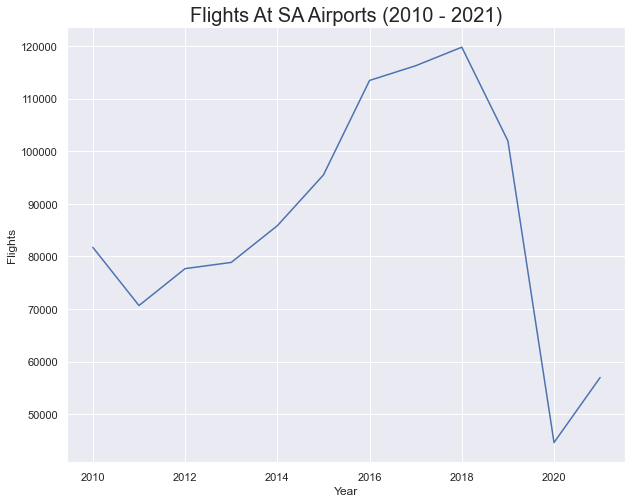

In [18]:
import seaborn as sns


sns.set(rc={'figure.figsize':(10,8)})
ax = sns.lineplot(x='Year', y='Flights', data = flights,ci=None)
ax.set_title('Flights At SA Airports (2010 - 2021)',fontsize=20)
plt.show()

**It is clear**, graph shows continuous increasing of flights, regarding the dramatic drop after 2019,<br>
We all know the reason for that, Covid19. This may effect some ivistigatione 

In [19]:
flights.groupby('Airport').Pax.sum().sort_values()

Airport
NUM        16700
ULH       321269
MED     58583438
DMM     91301734
RUH    241070940
JED    294800030
Name: Pax, dtype: int64

**Year of 2019**, had the maximum number of passengers with total of 103358070, any trends?

The flights data showed huge numbers, and for clean analysis i will split the data by aiprots, starting from domestic airports towards international aiports. That's provide clear calculations. 

In [20]:
flights.groupby(['Year','Airport']).Pax.sum()

Year  Airport
2010  DMM         4579263
      JED        17175822
      MED         2894187
      RUH        13553707
2011  DMM         5308443
                   ...   
2021  JED        13005716
      MED         1627388
      NUM            6328
      RUH        15428589
      ULH           74124
Name: Pax, Length: 62, dtype: int64

In [21]:
import plotly.graph_objects as go

import pandas as pd

df =pd.read_csv("long_lat_ong_lat_Sheet1.csv")
df['text'] = df['airport'] + ' ' + df['city'] + ', ' + '' + 'Travelrs: ' + df['serve'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['la'],
        text = df['text'],
        mode = 'markers',
        marker_color = 'tomato',
        #geo='geo3',
        ))
fig.update_geos(fitbounds="locations")
fig.update_layout(
        title = 'Saudi Arabia Total Air Passengers From 2010-2021  <br>(Hover for airport name and city)',
        geo_scope='asia',
    )
fig.show()

## 2. International Airports: Air Passengers Growing Precentages 2010 - 2021

### 2.1. King Khalid International Airport - RUH

King Khalid International Airport (IATA: RUH) is located in the capital city of Saudi Arabia, Riyadh. The largest city in the Kingdom, As the country’s capital, Riyadh hosts numerous government ministries and public services headquarters, making the public sector the city’s largest employer. <br> 
Vision 2030 have a major plans for Riyadh city, as it started 2016, Riyadh will be be one of the largest city economies in the world. This will changes numbers in every sector especially (Air passengers numbers). <br>

**Read data** from the dataset that only have RUH rows related to King Khalid airport: 

In [22]:
#1 Riyadhpax will have the values of flights data but only the rows about RUH 
Riyadhpax=flights[(flights['Airport'] == 'RUH')]
Riyadhpax.reset_index()

,index,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax
0,17,2010,RUH,30512,3520112,30096,3364229,24985,3428107,24847,3241259,110440,13553707
1,42,2011,RUH,30896,3807331,30489,3646701,27757,3787567,27521,3659775,116663,14901374
2,68,2012,RUH,37021,4558949,36428,4391651,30795,3926242,30698,4148670,134942,17025512
3,94,2013,RUH,37782,4761562,37145,4573903,32548,4334681,32433,4629905,139908,18300051
4,120,2014,RUH,40901,5311781,40688,5169502,31998,4987023,31791,4883999,145378,20352305
5,146,2015,RUH,46530,6187761,46781,6059886,32773,5375852,32558,5114668,158642,22738167
6,173,2016,RUH,56440,6302138,57182,6245549,41274,5700271,40511,5529815,195407,23777773
7,200,2017,RUH,55188,7236257,55468,7198679,46586,5900293,46290,6043563,203532,26378792
8,227,2018,RUH,56612,7814427,56744,7709819,47626,6172594,47763,6429791,208745,28126631
9,255,2019,RUH,62533,8453790,62031,8217263,43561,6285616,44038,6127569,212163,29084238


**Before** i dive deep to spesific, let's look for the total number of passenger through 2010 - 2021, after that i'm wondering what's the busiest year in the same period. Creating varibale with the name <code>Total_passengers_RUH</code> and another for the busiest year <code>Busiest_year_RUH</code> 

In [23]:
Total_passengers_RUH=Riyadhpax.Pax.sum()
print('Total number of air passengers (2010 - 2021) is',str(Total_passengers_RUH),'Millions')

Total number of air passengers (2010 - 2021) is 241070940 Millions


In [24]:
# Filter dataset with the maximum passnger number using max() function
Busiest_year_RUH=Riyadhpax.loc[(Riyadhpax["Pax"] == Riyadhpax.Pax.max()),:].reset_index()
Busiest_year_RUH[['Year','Pax']]

,Year,Pax
0,2019,29084238


In [25]:
# now i want only subset of the riyadh data, that only include three columns, for clear view
precentRiyadhpax=Riyadhpax[['Year','Airport','Pax']]
precentRiyadhpax = precentRiyadhpax.copy()  # Ensuring a copy is made to avoid warning note
precentRiyadhpax.reset_index()

,index,Year,Airport,Pax
0,17,2010,RUH,13553707
1,42,2011,RUH,14901374
2,68,2012,RUH,17025512
3,94,2013,RUH,18300051
4,120,2014,RUH,20352305
5,146,2015,RUH,22738167
6,173,2016,RUH,23777773
7,200,2017,RUH,26378792
8,227,2018,RUH,28126631
9,255,2019,RUH,29084238


In [26]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=precentRiyadhpax.Year, y=precentRiyadhpax.Pax,
                    mode='lines+markers',
                    name='markers'))
fig.update_layout(
    title="King Khalid International Airport",
    xaxis_title="Year",
    yaxis_title="Passengers Number",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)                        
fig.show()                    
                  

Now to calcuate the rate of changes, python have <code>pct_change()</code> (new column value - Previous column value)/(Previous column value) and i will apply this function to a passenger columns to have the result of rate changing through the years.

In [27]:
RUHprecentage=precentRiyadhpax['Pax'].pct_change()
precentRiyadhpax['increasing_rate_RUH']=RUHprecentage*100 # Assign the new value of changes 
precentRiyadhpax.reset_index()

,index,Year,Airport,Pax,increasing_rate_RUH
0,17,2010,RUH,13553707,NaN
1,42,2011,RUH,14901374,9.943162
2,68,2012,RUH,17025512,14.254645
3,94,2013,RUH,18300051,7.486054
4,120,2014,RUH,20352305,11.214471
5,146,2015,RUH,22738167,11.722810
6,173,2016,RUH,23777773,4.572075
7,200,2017,RUH,26378792,10.938867
8,227,2018,RUH,28126631,6.625925
9,255,2019,RUH,29084238,3.404627


Rate of changes is increasing, with the highest rate of 14.25% in **2012**.
<li>In this year 22 airplanes (Boeing) was added to Saudi aircraft, this may result on increasing the air passengers travelers.<li> Also, new expansion plan was decided in 2012, to enhance all the airport facilities.<br> <li>The year 2021 after Covid-19, increasing rate of 35% with 15,428,589 passengers, this show positive sign to recover.

####  International and Domestic Arrivals to RUH Airport

**In brief**, i show passngers numbers in total, now i will show columns related to arrivals from either International or Domestic directions.

In [28]:
# I will apply pct_change() function to two columns (PaxA-international,PaxA-Domestic)
RiyadhpaxArrival=Riyadhpax[['Year','Airport','PaxA-international','PaxA-Domestic']]
RiyadhpaxArrival=RiyadhpaxArrival.copy()
#1 first column
ch_arr=RiyadhpaxArrival['PaxA-international'].pct_change()
RiyadhpaxArrival['increasing_rate_international']=ch_arr*100 # To have result in precentages
#2 second column
ch_arr_Domestic=RiyadhpaxArrival['PaxA-Domestic'].pct_change()
RiyadhpaxArrival['increasing_rate_domestic']=ch_arr_Domestic*100

RiyadhpaxArrival.head(12)

,Year,Airport,PaxA-international,PaxA-Domestic,increasing_rate_international,increasing_rate_domestic
17,2010,RUH,3428107,3520112,NaN,NaN
42,2011,RUH,3787567,3807331,10.485670,8.159371
68,2012,RUH,3926242,4558949,3.661321,19.741336
94,2013,RUH,4334681,4761562,10.402797,4.444292
120,2014,RUH,4987023,5311781,15.049366,11.555431
146,2015,RUH,5375852,6187761,7.796816,16.491267
173,2016,RUH,5700271,6302138,6.034746,1.848439
200,2017,RUH,5900293,7236257,3.508991,14.822256
227,2018,RUH,6172594,7814427,4.615042,7.989904
255,2019,RUH,6285616,8453790,1.831029,8.181828


##### Arrivals Flights  - RUH

Since 2019 was the year with largest air passenger numbers, and with announcing new tourism plans, dose this ruselt in more international or domestic arrivals flights?<br> only data can tell.

In [29]:
Riyadh_Ar=flights[(flights['Airport'] == 'RUH')]
Riyadh_A_flights=Riyadh_Ar[['Year','Airport','FlightsA-international','FlightsA-Domestic']]
Riyadh_A_flights

,Year,Airport,FlightsA-international,FlightsA-Domestic
17,2010,RUH,24985,30512
42,2011,RUH,27757,30896
68,2012,RUH,30795,37021
94,2013,RUH,32548,37782
120,2014,RUH,31998,40901
146,2015,RUH,32773,46530
173,2016,RUH,41274,56440
200,2017,RUH,46586,55188
227,2018,RUH,47626,56612
255,2019,RUH,43561,62533


In [30]:
Riyadh_A_flights=Riyadh_A_flights.copy()
# again applying pct_change() to have the rate changes
# International flights
Riyadh_Ar_changes=Riyadh_A_flights['FlightsA-international'].pct_change()
Riyadh_A_flights['changes_international_arr']=Riyadh_Ar_changes*100 # to convert result to absolute are 
# Domestic flights
Riyadh_AD_changes=Riyadh_A_flights['FlightsA-Domestic'].pct_change()
Riyadh_A_flights['changes_domestic_arr']=Riyadh_AD_changes*100


Riyadh_A_flights

,Year,Airport,FlightsA-international,FlightsA-Domestic,changes_international_arr,changes_domestic_arr
17,2010,RUH,24985,30512,NaN,NaN
42,2011,RUH,27757,30896,11.094657,1.258521
68,2012,RUH,30795,37021,10.944987,19.824573
94,2013,RUH,32548,37782,5.692483,2.055590
120,2014,RUH,31998,40901,-1.689812,8.255254
146,2015,RUH,32773,46530,2.422026,13.762500
173,2016,RUH,41274,56440,25.939035,21.298087
200,2017,RUH,46586,55188,12.870088,-2.218285
227,2018,RUH,47626,56612,2.232430,2.580271
255,2019,RUH,43561,62533,-8.535254,10.458913


So the answer to my <i>question above</i>,  number of domestic arrivals flight to Riyadh, increased by 10.45% in 2019.<br> <li>Passengers from the inside were the key of this increasement</li> not surprising because in 2019  Riyadh season was launched by the General Entertainment Authority. The festival is part of the Kingdom's Vision 2030 and its goal to enhance the quality of life for citizens and residents. 

**2016** shows the highest increasing flights rate of 21% comparing to 2015, this maybe the result of increased/added new destinations of the popular carrier (flynas), along with that, the new terminal 5 opend in 2016.

In [31]:
import plotly.express as px

fig = px.line(
x=Riyadh_A_flights.Year,
y= Riyadh_A_flights.changes_international_arr,
labels=dict(x="Year", y="Changes")

)
fig.add_scatter(x=Riyadh_A_flights.Year,
y=Riyadh_A_flights.changes_international_arr,
name = 'RUH - International Flights Arrival',

)
fig.add_scatter(x=Riyadh_A_flights.Year,
y=Riyadh_A_flights.changes_domestic_arr,
name = 'RUH - Domestic Flights Arrival')

# Hide grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Domestic arrivals to Riyadh is increased by 10% in it's second largest increased after 2016, therefor, the tourism events was opend in 2019 for the first time. Arrival flights from out decreased. Even though the arrivals number of passenger in 2019 increased by 1.83% from 2018.

#### 2.1.1 Air Passengers Monthly - RUH

In [32]:
# assign Riyadh airport rows to new varibale
Riyadh=passengers[['Year','Month_short','dom/intl','RUH']]
Riyadh.sample(10)

# save the mean of air passengers numbers from (2015-2022) because the passenger dataset are limited to this period
riyadh=Riyadh.groupby(['Year']).agg({'RUH':'mean'})
#Riyadh

Since 2019 having clear factors behind the growth of passengers, i will plot the number of passengers (international, domestic) starting from 2019 - 2021

In [33]:
# filter to have only the three years  

RUH_2019=Riyadh.loc[(Riyadh["Year"] == 2019),:].reset_index()
RUH_2020=Riyadh.loc[(Riyadh["Year"] == 2020),:].reset_index()
RUH_2021=Riyadh.loc[(Riyadh["Year"] == 2021),:].reset_index()

In [34]:
# filter to have only international travellers 
Riyadh_international_2019=RUH_2019.loc[(RUH_2019["dom/intl"] == "international"),:].reset_index()
Riyadh_international_2020=RUH_2020.loc[(RUH_2020["dom/intl"] == "international"),:].reset_index()
Riyadh_international_2021=RUH_2021.loc[(RUH_2021["dom/intl"] == "international"),:].reset_index()

Riyadh_domestic_2019=RUH_2019.loc[(RUH_2019["dom/intl"] == "Domestic"),:].reset_index()
Riyadh_domestic_2020=RUH_2020.loc[(RUH_2020["dom/intl"] == "Domestic"),:].reset_index()
Riyadh_domestic_2021=RUH_2021.loc[(RUH_2021["dom/intl"] == "Domestic"),:].reset_index()


In [35]:
# import libraries to use visualization plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("International Air Passengers 2019", "International Air Passengers 2020", "International Air Passengers 2021"))

fig.add_trace(go.Scatter(x=Riyadh_international_2019.Month_short, y=Riyadh_international_2019.RUH),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Riyadh_international_2020.Month_short, y=Riyadh_international_2020.RUH),
              row=2, col=1)

fig.add_trace(go.Scatter(x=Riyadh_international_2021.Month_short, y=Riyadh_international_2021.RUH),
              row=3, col=1)



fig.update_layout(height=500, width=1000,
                  title_text=" Number Of Passengers to Riyadh from International Airports (2015 - 2021)")

fig.show()

<li>Riyadhd Season ( From Oct - Jan):</li>
Numbers shows increas in these months.
<li>January International Air passengers:</li> The highest number of passengers of Jan month was in  2020, Saudi hosts Saudi Arabia hosts the Dakar Rally, the first time the legendary desert race has taken place in the Middle East
<li>August 2021:</li>
Numbers shows increas in this months, i assum this related to annouce the country in (1, Aug) to welcome again international tourism’s 

In [36]:
# import libraries to use visualization plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Domestic Air Passengers 2019", "Domestic Air Passengers 2020", "Domestic Air Passengers 2021"))

fig.add_trace(go.Scatter(x=Riyadh_domestic_2019.Month_short, y=Riyadh_domestic_2019.RUH),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Riyadh_domestic_2020.Month_short, y=Riyadh_domestic_2020.RUH),
              row=2, col=1)

fig.add_trace(go.Scatter(x=Riyadh_domestic_2021.Month_short, y=Riyadh_domestic_2021.RUH),
              row=3, col=1)



fig.update_layout(height=500, width=1000,
                  title_text=" Number Of Passengers To Riyadh from Domestic Airports (2015 - 2021)")

fig.show()

Same for domestic arrivals, **increasing in the months that lunched Riyadh seasons** from Oct-Jan, <br>, and in (March,2019) "Saudi Airshow hosted a mix of business, general and commercial aviation and aerospace exhibitors"

### 2.2. King Abdulaziz International Airport - JED

King Abdulaziz International Airport - JED, is located in Jeddah city, second popular city in the Kingdom. Jeddah is the gate entry to the Haram Mosque, Millions of pilgrims every year visited Makkah, numbers shows huge increasing of thier numbers, and this is one of Vision 2030 achievements. 

In [37]:
# Filter rows to have only values of JED > King Abdulaziz International Airport
JEDpax=flights[(flights['Airport'] == 'JED')]
JEDpax.reset_index()

,index,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax
0,13,2010,JED,25242,3160789,24438,3081098,45083,5228093,45076,5705842,139839,17175822
1,38,2011,JED,26143,3455917,25796,3376883,50366,5894360,50506,6443031,152811,19170191
2,64,2012,JED,29449,3827512,28571,3972258,52524,5058910,52526,7578896,163070,20437576
3,90,2013,JED,30427,4043354,28833,4018884,49168,5673630,49958,7185243,158386,20921111
4,116,2014,JED,32886,4392926,30755,4374638,54766,7223143,56354,8467606,174761,24458313
5,142,2015,JED,40352,5438502,39467,5551293,58065,8601578,59356,8955543,197240,28546916
6,168,2016,JED,48391,5453914,46885,5453705,64941,9699708,66372,10567939,226589,31175266
7,195,2017,JED,46074,5947047,44714,5871497,67783,10629983,69236,11725411,227807,34173938
8,222,2018,JED,48021,6586645,46389,6336083,69516,10772800,71137,12311381,235063,36006909
9,249,2019,JED,53385,7133625,51994,7040227,67625,11237016,68936,12129993,241940,37540861


In [38]:
precentJEDpax=JEDpax[['Year','Airport','Pax']]
precentJEDpax = precentJEDpax.copy()  # Ensuring a copy is made to avoid warning note, .loc() could be used insted
precentJEDpax.reset_index()

,index,Year,Airport,Pax
0,13,2010,JED,17175822
1,38,2011,JED,19170191
2,64,2012,JED,20437576
3,90,2013,JED,20921111
4,116,2014,JED,24458313
5,142,2015,JED,28546916
6,168,2016,JED,31175266
7,195,2017,JED,34173938
8,222,2018,JED,36006909
9,249,2019,JED,37540861


The largesr numbers of travellers within King Abdulaziz International Airport, was in 2019 the year that King Salman Bin Abdualaziz opened the **New Airport of King Abdulaziz International Airport** .

In [39]:
# Now measuring the rate changes of passengers
JEDprecentage=precentJEDpax['Pax'].pct_change()
precentJEDpax['increasing_precentage']=JEDprecentage*100 # Assign the new value of changes * 100 
precentJEDpax.reset_index()

,index,Year,Airport,Pax,increasing_precentage
0,13,2010,JED,17175822,NaN
1,38,2011,JED,19170191,11.611491
2,64,2012,JED,20437576,6.611228
3,90,2013,JED,20921111,2.365912
4,116,2014,JED,24458313,16.907333
5,142,2015,JED,28546916,16.716619
6,168,2016,JED,31175266,9.207124
7,195,2017,JED,34173938,9.618754
8,222,2018,JED,36006909,5.363652
9,249,2019,JED,37540861,4.260160


####  International arrivals to JED airports

In [40]:
# subset to have only three columns for calculations
JeddahpaxArrival=JEDpax[['Year','Airport','PaxA-international']]
JeddahpaxArrival=JeddahpaxArrival.copy()
# measuring the rate of changes in the international arrivals passengers
ch_arr_JED=JeddahpaxArrival['PaxA-international'].pct_change()
JeddahpaxArrival['Chages %']=ch_arr_JED*100
JeddahpaxArrival.head(12)

,Year,Airport,PaxA-international,Chages %
13,2010,JED,5228093,NaN
38,2011,JED,5894360,12.743978
64,2012,JED,5058910,-14.173719
90,2013,JED,5673630,12.151234
116,2014,JED,7223143,27.310787
142,2015,JED,8601578,19.083590
168,2016,JED,9699708,12.766611
195,2017,JED,10629983,9.590753
222,2018,JED,10772800,1.343530
249,2019,JED,11237016,4.309149


The lowest rate was -14.17%, in 2012, plans of increasing the area of Al Haram was lunched in 2012, Saudi limits the numbers of pilgrims.
While the highest rate of changes was in 2014 with 27% increasing compared to 2013, in 2014 was one of the largest expansion of Al Haram, its goal was to welcome more than 43 Million visitors. 

#### Arrivals Flights  - JED


In [41]:
# comparing that show the changes of flights (arrivals > international, domestic)
Jeddah_A_flights=JEDpax[['Year','Airport','FlightsA-international','FlightsA-Domestic',]]
Jeddah_A_flights

,Year,Airport,FlightsA-international,FlightsA-Domestic
13,2010,JED,45083,25242
38,2011,JED,50366,26143
64,2012,JED,52524,29449
90,2013,JED,49168,30427
116,2014,JED,54766,32886
142,2015,JED,58065,40352
168,2016,JED,64941,48391
195,2017,JED,67783,46074
222,2018,JED,69516,48021
249,2019,JED,67625,53385


In [42]:
Jeddah_A_flights=Jeddah_A_flights.copy()
#1 changes rate in international arrivals flights to jeddah
Jeddah_Ar_changes=Jeddah_A_flights['FlightsA-international'].pct_change()
Jeddah_A_flights['changes_international_arr']=Jeddah_Ar_changes*100

#1 changes rate in domestic arrivals flights to jeddah
Jeddah_D_changes=Jeddah_A_flights['FlightsA-Domestic'].pct_change()
Jeddah_A_flights['changes_domestic_arr']=Jeddah_D_changes*100

Jeddah_A_flights

,Year,Airport,FlightsA-international,FlightsA-Domestic,changes_international_arr,changes_domestic_arr
13,2010,JED,45083,25242,NaN,NaN
38,2011,JED,50366,26143,11.718386,3.569448
64,2012,JED,52524,29449,4.284636,12.645833
90,2013,JED,49168,30427,-6.389460,3.320996
116,2014,JED,54766,32886,11.385454,8.081638
142,2015,JED,58065,40352,6.023810,22.702670
168,2016,JED,64941,48391,11.841901,19.922185
195,2017,JED,67783,46074,4.376280,-4.788080
222,2018,JED,69516,48021,2.556688,4.225811
249,2019,JED,67625,53385,-2.720237,11.170113


Huge increasing in 2015, 2016 same years after the largest expansion of Al Haram . 

In [43]:
JEDpax=JEDpax.copy()

# Here i will compare the arrivals (Domestic - International)
sum_arrivals=JEDpax['PaxA-Domestic']+JEDpax['PaxA-international']
JEDpax['total_arrival_pax']=sum_arrivals

# Domestic arrivals out of total arrivals through the years
out_of_total=(JEDpax['PaxA-Domestic']/JEDpax['total_arrival_pax'])*100

# mean precentage of domestic arrivals to jeddah
mean_of_domestic_passengers=out_of_total.mean()
mean_of_domestic_passengers

41.69220163298103

In [44]:
# international arrivals out of total arrivals through the years
out_of_total_I=(JEDpax['PaxA-international']/JEDpax['total_arrival_pax'])*100
out_of_total_I.mean() # mean precentage of international arrivals to jeddah


58.30779836701896

Number of international arrivals are from outside Saudi Arabia, except after 2020 Covid-19, 63.57% arrivals to jeedah were from the inside, where 36.42% from international destination 

In [45]:
rate = [41.69 , 58.30]
status = ['Domestic Passengers' , 'International Passengers']
data = go.Pie(
values= rate,
labels= status,
)
layout = go.Layout(
title=dict(text = "Passenger by Airport(International/Domestic)",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

#### 2.2.1 Air Passengers Monthly - JED

In [46]:
Jeddah=passengers[['Year','Month_short','dom/intl','JED']]
Jeddah.head()

jeddah=Jeddah.groupby(['Year']).agg({'JED':'mean'})
jeddah

,JED
Year,
2015,1.189455e+06
2016,1.298969e+06
2017,1.423914e+06
2018,1.501535e+06
2019,1.565417e+06
2020,5.078088e+05
2021,5.882223e+05
2022,5.533898e+05


In [47]:
# Plot to show the mean number of passengers in Jeddah 
x = jeddah.index
y = jeddah.JED
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, fill='tozeroy',marker = dict(color = 'gold'))) # fill down to xaxis
# Hide grid lines
fig.update_layout(title_text='The average number of passengers in King Abualaziz Airport (2015-2022)', title_x=0.5)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 2.3. King Fahd International Airport - DMM

King Fahd International Airport - DMM, the three largest airport in the world, and one of the most growing air passengers, Dammam the oil industry have its importan placce as it serve different cities and being near to four countries.

In [48]:
# filter data with only DMM code
DMMpax=flights[(flights['Airport'] == 'DMM')]
DMMpax.reset_index()

,index,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax
0,5,2010,DMM,10574,1111447,10611,1093376,12241,1204119,12155,1170321,45581,4579263
1,30,2011,DMM,10976,1174453,10998,1164244,14510,1512760,14448,1456986,50932,5308443
2,56,2012,DMM,12088,1363547,12041,1363242,16063,1573788,15949,1834952,56141,6135529
3,82,2013,DMM,13450,1532397,13228,1498327,17107,1858535,17100,1983093,60885,6872352
4,108,2014,DMM,15009,1733536,15175,1768501,18442,2327684,18290,2212398,66916,8042119
5,134,2015,DMM,16593,2007243,16664,2050397,19478,2619612,19428,2469605,72163,9146857
6,160,2016,DMM,24100,2259768,23927,2261833,21083,2622519,21257,2567214,90367,9711334
7,187,2017,DMM,25763,2595960,25735,2572790,19834,2420037,19857,2561042,91189,10149829
8,214,2018,DMM,26401,2766651,26522,2776042,20261,2350707,20193,2561513,93377,10454913
9,241,2019,DMM,28786,3152291,28749,3168537,18613,2453865,18642,2393690,94790,11168383


In [49]:
precentDMMpax=DMMpax[['Year','Airport','Pax']]
precentDMMpax = precentDMMpax.copy()  # Ensuring a copy is made to avoid warning note

precentDMMpax.reset_index()

,index,Year,Airport,Pax
0,5,2010,DMM,4579263
1,30,2011,DMM,5308443
2,56,2012,DMM,6135529
3,82,2013,DMM,6872352
4,108,2014,DMM,8042119
5,134,2015,DMM,9146857
6,160,2016,DMM,9711334
7,187,2017,DMM,10149829
8,214,2018,DMM,10454913
9,241,2019,DMM,11168383


In [50]:
# finding the precentage of changes
DMMprecentage=precentDMMpax['Pax'].pct_change()
precentDMMpax['increasing_precentage']=DMMprecentage*100 # Assign the new value of changes 
precentDMMpax.reset_index()

,index,Year,Airport,Pax,increasing_precentage
0,5,2010,DMM,4579263,NaN
1,30,2011,DMM,5308443,15.923523
2,56,2012,DMM,6135529,15.580576
3,82,2013,DMM,6872352,12.009119
4,108,2014,DMM,8042119,17.021349
5,134,2015,DMM,9146857,13.736902
6,160,2016,DMM,9711334,6.171267
7,187,2017,DMM,10149829,4.515291
8,214,2018,DMM,10454913,3.005804
9,241,2019,DMM,11168383,6.824256


Rate of chnages shows increasing through the years, Dammam have been the destinations of Gulf States citizens, and major administrative center for the Saudi oil industry. "More than 86% of Saudi basic industries are located in this province" , so this show how the movement of air passengers will increase year on year.

#### 4.3.1. International arrivals to DMM airports

In [51]:
DammampaxArrival=DMMpax[['Year','Airport','PaxA-international']]
DammampaxArrival=DammampaxArrival.copy()
ch_arr_DMM=DammampaxArrival['PaxA-international'].pct_change()
DammampaxArrival['Chages %']=ch_arr_DMM
DammampaxArrival['Chages %']=DammampaxArrival['Chages %'].map("{:.2%}".format)
DammampaxArrival.head(12)

,Year,Airport,PaxA-international,Chages %
5,2010,DMM,1204119,nan%
30,2011,DMM,1512760,25.63%
56,2012,DMM,1573788,4.03%
82,2013,DMM,1858535,18.09%
108,2014,DMM,2327684,25.24%
134,2015,DMM,2619612,12.54%
160,2016,DMM,2622519,0.11%
187,2017,DMM,2420037,-7.72%
214,2018,DMM,2350707,-2.86%
241,2019,DMM,2453865,4.39%


**2014** in this year rate of chnage was 25.24% compared to 2013, Dammam has been selected as the new location for the Construction Machinery Show 2014and for its relevance to heavy construction and machinery equipment. Dammam has been selected as the new location for the show, for its relevance to heavy construction and machinery equipment. The timing of the event has been moved to prevent clashing with international machinery events in April such as Bauma and Conexpo. 

### Arrivals Flights  - DMM


In [52]:
Dammam_A_flights=DMMpax[['Year','Airport','FlightsA-international','FlightsA-Domestic']]
Dammam_A_flights=Dammam_A_flights.copy()
# 1. applying .pct_change() to find the rate changes year on year for internatinal arrival flights
Dammam_A_changes=Dammam_A_flights['FlightsA-international'].pct_change()
Dammam_A_flights['changes_international_arr']=Dammam_A_changes*100

# 2. applying .pct_change() to find the rate changes year on year for domestic arrival flights
Dammam_D_changes=Dammam_A_flights['FlightsA-Domestic'].pct_change()
Dammam_A_flights['changes_domestic_arr']=Dammam_D_changes*100

Dammam_A_flights

,Year,Airport,FlightsA-international,FlightsA-Domestic,changes_international_arr,changes_domestic_arr
5,2010,DMM,12241,10574,NaN,NaN
30,2011,DMM,14510,10976,18.536067,3.801778
56,2012,DMM,16063,12088,10.702963,10.131195
82,2013,DMM,17107,13450,6.499409,11.267373
108,2014,DMM,18442,15009,7.803823,11.591078
134,2015,DMM,19478,16593,5.617612,10.553668
160,2016,DMM,21083,24100,8.240066,45.241970
187,2017,DMM,19834,25763,-5.924204,6.900415
214,2018,DMM,20261,26401,2.152869,2.476420
241,2019,DMM,18613,28786,-8.133853,9.033749


#### 2.3.1 Monthly Air Passengers - DMM


In [53]:
# dataset with month specified
Dammam=passengers[['Year','Month_short','dom/intl','DMM']]
Dammam.head()

dammam=Dammam.groupby(['Year']).agg({'DMM':'mean'})
dammam

,DMM
Year,
2015,381119.041667
2016,404638.916667
2017,422909.541667
2018,435621.375000
2019,465349.291667
2020,176573.916667
2021,248808.291667
2022,236255.750000


In [54]:
# Plot to show the mean number of passengers in dammam 
x = dammam.index
y = dammam.DMM
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, fill='tozeroy',marker = dict(color = 'gold'))) # fill down to xaxis
# Hide grid lines
fig.update_layout(title_text='The average number of passengers in King Fhad Airport (2015-2022)', title_x=0.5)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [55]:
# i want to find the mean for every year, both international and domestic
# create separate variables 
JEDpax_domestic=Dammam[(Dammam['dom/intl'] == 'Domestic')]
JEDpax_international=Dammam[(Dammam['dom/intl'] == 'international')]
JEDpax_domestic

,Year,Month_short,dom/intl,DMM
0,2015,Jan,Domestic,393682
2,2015,Feb,Domestic,332365
4,2015,Mar,Domestic,375757
6,2015,Apr,Domestic,319034
8,2015,May,Domestic,342345
...,...,...,...,...
162,2021,Oct,Domestic,353113
164,2021,Nov,Domestic,397817
166,2021,Dec,Domestic,432727
168,2022,Jan,Domestic,388343


In [56]:
# import libraries to use visualization plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Domestic Average Passengers 2015-2022", "International Average Passengers 2015-2022"))

fig.add_trace(go.Scatter(x=dammamMonthly_domestic.index, y=dammamMonthly_domestic.DMM),
              row=1, col=1)

fig.add_trace(go.Scatter(x=dammamMonthly_international.index, y=dammamMonthly_international.DMM),
              row=2, col=1)



fig.update_layout(height=500, width=1000,
                  title_text=" Number Of Passengers To Dammam from Domestic/International Airports (2015 - 2022 Jan - Feb)")

fig.show()

NameError: name 'dammamMonthly_domestic' is not defined

### 2.4. Prince Mohammed Bin Abdulaziz International Airport - MED

Prince Mohammed Bin Abdulaziz International Airport - MED, loccated in Al Madenah city, that have Al-Masjid an-Nabaw, "Prophet's Mosque" , million of visitors every year pass through Al Madenah and Makkah, the second largest mosque and second holiest site in Islam, air passengers is increasing year on year to visit this city.

In [ ]:
# filter the flight data with MED code airport
MEDpax=flights[(flights['Airport'] == 'MED')]
MEDpax.reset_index()

,index,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax
0,14,2010,MED,8517,653114,9715,665746,7050,1044396,5767,530931,31049,2894187
1,39,2011,MED,8352,687773,9765,728411,8216,1135071,6555,704193,32888,3255448
2,65,2012,MED,8801,805487,10374,833822,8306,1262359,6574,920447,34055,3822115
3,91,2013,MED,9007,810630,10415,857337,8389,1106371,7113,902716,34924,3677054
4,117,2014,MED,9529,877185,12048,1051324,10929,1336931,9244,1055893,41750,4321333
5,143,2015,MED,10587,969570,12103,1016213,13926,2256347,12415,1589033,49031,5831163
6,169,2016,MED,11026,1027566,12218,1080965,16199,2576960,15008,1887296,54451,6572787
7,196,2017,MED,10048,1133308,11753,1209758,18977,3094385,17267,2367844,58045,7805295
8,223,2018,MED,10521,1163323,13203,1322617,19808,3235944,17133,2422906,60665,8144790
9,250,2019,MED,11048,1223932,13012,1376222,19255,3321752,17289,2462067,60604,8383973


In [ ]:
precentMEDpax=MEDpax[['Year','Airport','Pax']]
precentMEDpax = precentMEDpax.copy()  # Ensuring a copy is made

precentMEDpax.reset_index()

,index,Year,Airport,Pax
0,14,2010,MED,2894187
1,39,2011,MED,3255448
2,65,2012,MED,3822115
3,91,2013,MED,3677054
4,117,2014,MED,4321333
5,143,2015,MED,5831163
6,169,2016,MED,6572787
7,196,2017,MED,7805295
8,223,2018,MED,8144790
9,250,2019,MED,8383973


In [ ]:
# measuring the increasing rate
MEDprecentage=precentMEDpax['Pax'].pct_change()
precentMEDpax['increasing_precentage']=MEDprecentage*100 # Assign the new value of changes 
precentMEDpax.reset_index()

,index,Year,Airport,Pax,increasing_precentage
0,14,2010,MED,2894187,NaN
1,39,2011,MED,3255448,12.482296
2,65,2012,MED,3822115,17.406729
3,91,2013,MED,3677054,-3.795307
4,117,2014,MED,4321333,17.521608
5,143,2015,MED,5831163,34.938988
6,169,2016,MED,6572787,12.718286
7,196,2017,MED,7805295,18.751680
8,223,2018,MED,8144790,4.349547
9,250,2019,MED,8383973,2.936638


**2015** , the highest rate of increasing of passengers number 34.93% compared to 2014, new Prince Mohammed Bin Abdulaziz International Airport was opend in 2015, this will increase the airport’s throughput from 5.7 million a year to eight million passengers a year.

 

#### International And Domestic arrivals Passengers to MED airports

In [ ]:
# comparing the changes year on year to passengers from domestic airports and passengers from international airports
MedinapaxArrival=MEDpax[['Year','Airport','PaxA-international','PaxA-Domestic']]
MedinapaxArrival=MedinapaxArrival.copy()
ch_arr_MED=MedinapaxArrival['PaxA-international'].pct_change()
MedinapaxArrival['Chages_International']=ch_arr_MED*100
# passengers from domestic airports
ch_arr_D_MED=MedinapaxArrival['PaxA-Domestic'].pct_change()
MedinapaxArrival['Chages_Domestic']=ch_arr_D_MED*100
MedinapaxArrival.head(12)

,Year,Airport,PaxA-international,PaxA-Domestic,Chages_International,Chages_Domestic
14,2010,MED,1044396,653114,NaN,NaN
39,2011,MED,1135071,687773,8.682052,5.306731
65,2012,MED,1262359,805487,11.214100,17.115240
91,2013,MED,1106371,810630,-12.356865,0.638496
117,2014,MED,1336931,877185,20.839303,8.210281
143,2015,MED,2256347,969570,68.770640,10.531986
169,2016,MED,2576960,1027566,14.209384,5.981621
196,2017,MED,3094385,1133308,20.078891,10.290531
223,2018,MED,3235944,1163323,4.574705,2.648442
250,2019,MED,3321752,1223932,2.651715,5.209989


**International arrivals** increased from 1336931 to 2256347 in 2015, with 68.77% with highest increased rate in all the years.

In [ ]:
import plotly.express as px

fig = px.line(
x=MedinapaxArrival.Year,
y= ch_arr_MED,
labels=dict(x="Year", y="Changes"))
fig.add_scatter(x=precentMEDpax.Year,
y=ch_arr_MED,
name = 'Medina - international arrivals',

)
fig.add_scatter(x=MedinapaxArrival.Year,
y=ch_arr_D_MED,
name = 'Medina - Domestic arrivals',
)

### Arrival Flights to MED

In [ ]:
arrivalflights=MEDpax[['Year','Airport','FlightsA-international','FlightsA-Domestic']]
arrivalflights=arrivalflights.copy()

I_arrivalflights_changes=arrivalflights['FlightsA-international'].pct_change()
D_arrivalflights_changes=arrivalflights['FlightsA-Domestic'].pct_change()

arrivalflights['changes_international_arr']=I_arrivalflights_changes*100
arrivalflights['changes_domestic_arr']=D_arrivalflights_changes*100
arrivalflights


,Year,Airport,FlightsA-international,FlightsA-Domestic,changes_international_arr,changes_domestic_arr
14,2010,MED,7050,8517,NaN,NaN
39,2011,MED,8216,8352,16.539007,-1.937302
65,2012,MED,8306,8801,1.095424,5.375958
91,2013,MED,8389,9007,0.999278,2.340643
117,2014,MED,10929,9529,30.277745,5.795492
143,2015,MED,13926,10587,27.422454,11.102949
169,2016,MED,16199,11026,16.321988,4.146595
196,2017,MED,18977,10048,17.149207,-8.869944
223,2018,MED,19808,10521,4.378985,4.707404
250,2019,MED,19255,11048,-2.791801,5.009030


**Number** of international arrivals flights increased in 2015 after the new airport in 2015 with 27.42% compared to 2014

In [ ]:
# mean number of passengers every month 
Medina=passengers[['Year','Month_short','dom/intl','MED']]
Medina
Medina=Medina.groupby('Month_short').MED.mean()
Medina

Month_short
Apr    239623.428571
Aug    292010.214286
Dec    265788.785714
Feb    225878.500000
Jan    271412.250000
Jul    230544.642857
Jun    205260.642857
Mar    257926.500000
May    234457.142857
Nov    186716.642857
Oct    186206.642857
Sep    263098.428571
Name: MED, dtype: float64

The highest mean is in July, Al Hajj Month.

## 3. AlUla Airport And Neom Airport

### 3.1 Prince Abdul Majeed bin Abdulaziz  Airport - ULH

The airport was established on 31 October 2011, let's measure the numbers from 2010-2021. AlUla 

In [ ]:
Alula_yearly=flights[(flights['Airport'] == 'ULH')]
Alula_yearly

,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax
47,2011,ULH,19,585,19,442,0,0,0,0,38,1027
73,2012,ULH,107,4231,107,4379,0,0,0,0,214,8610
99,2013,ULH,107,4541,106,4598,0,0,0,0,213,9139
125,2014,ULH,200,7195,200,6943,0,0,0,0,400,14138
151,2015,ULH,208,10753,208,11246,0,0,0,0,416,21999
178,2016,ULH,260,11136,261,11808,0,0,1,0,522,22944
205,2017,ULH,367,12118,362,13025,14,0,15,0,758,25143
232,2018,ULH,547,16808,544,17119,11,104,11,198,1113,34229
260,2019,ULH,700,29642,707,29388,120,966,111,1142,1638,61138
288,2020,ULH,589,23325,584,23179,146,1277,151,997,1470,48778


In [ ]:
Alula_yearly=Alula_yearly.copy()
FlightsA_Domestic_changes=Alula_yearly['FlightsA-Domestic'].pct_change()
Alula_yearly['Changes_Flights_arrival_D']=FlightsA_Domestic_changes*100
PaxA_Domestic_changes=Alula_yearly['PaxA-Domestic'].pct_change()
Alula_yearly['Changes_Passengers_arrival_D']=PaxA_Domestic_changes*100
FlightsA_international_changes=Alula_yearly['FlightsA-international'].pct_change()
Alula_yearly['Changes_Flights_arrival_International']=FlightsA_international_changes*100
PaxA_international_changes=Alula_yearly['PaxA-international'].pct_change()
Alula_yearly['Changes_Passengers_arrival_International']=PaxA_international_changes*100
Pax_changes=Alula_yearly['Pax'].pct_change()
Alula_yearly['total_passengers_changes']=Pax_changes*100
Alula_yearly

,Year,Airport,FlightsA-Domestic,PaxA-Domestic,FlightsD-Domestic,PaxD-Domestic,FlightsA-international,PaxA-international,FlightsD-international,PaxD-international,Flights,Pax,Changes_Flights_arrival_D,Changes_Passengers_arrival_D,Changes_Flights_arrival_International,Changes_Passengers_arrival_International,total_passengers_changes
47,2011,ULH,19,585,19,442,0,0,0,0,38,1027,NaN,NaN,NaN,NaN,NaN
73,2012,ULH,107,4231,107,4379,0,0,0,0,214,8610,463.157895,623.247863,NaN,NaN,738.364167
99,2013,ULH,107,4541,106,4598,0,0,0,0,213,9139,0.000000,7.326873,NaN,NaN,6.144019
125,2014,ULH,200,7195,200,6943,0,0,0,0,400,14138,86.915888,58.445276,NaN,NaN,54.699639
151,2015,ULH,208,10753,208,11246,0,0,0,0,416,21999,4.000000,49.451008,NaN,NaN,55.601924
178,2016,ULH,260,11136,261,11808,0,0,1,0,522,22944,25.000000,3.561797,NaN,NaN,4.295650
205,2017,ULH,367,12118,362,13025,14,0,15,0,758,25143,41.153846,8.818247,inf,NaN,9.584205
232,2018,ULH,547,16808,544,17119,11,104,11,198,1113,34229,49.046322,38.702756,-21.428571,inf,36.137295
260,2019,ULH,700,29642,707,29388,120,966,111,1142,1638,61138,27.970750,76.356497,990.909091,828.846154,78.614625
288,2020,ULH,589,23325,584,23179,146,1277,151,997,1470,48778,-15.857143,-21.310978,21.666667,32.194617,-20.216559


NaN because there was no international flights before 2017

Number of passngers that arrives from domestic airports increased by 76.35% in 2019, and for international also a huge increasing rate. This year is where "The Royal Commission for AlUla announced its vision to responsibly develop AlUla as a world heritage destination "<br> And Even though 2020 Covid hit over, 2021 is the brighter year as a big rate of changes with 58% increasing in the passengers of domestic airports. And for the international 2020 was the top year of international passengers number, because 2020 was the **"** Desert X AlUla is the first international collaboration for Desert X, which was founded to connect desert communities and cultures through contemporary art. The exhibition will bring together artists from Saudi Arabia and the surrounding region with artists from around the world presenting large-scale installations, including site-specific works and commissions that respond to the landscape and specific conditions of the desert. **"**

In [ ]:
Alula=passengers[['Year','Month_short','dom/intl','ULH']]
#Alula.tail(30)

In [ ]:
# having numbers of passengers per month months, plotting them will give clear increasing of the numbers
Alula_domestic=Alula.loc[(Alula["dom/intl"] == "Domestic"),:].reset_index()

Y2018=Alula_domestic.loc[(Alula_domestic["Year"] == 2018),:].reset_index()
Y2018
Y2019=Alula_domestic.loc[(Alula_domestic["Year"] == 2019),:].reset_index()
Y2019
Y2020=Alula_domestic.loc[(Alula_domestic["Year"] == 2020),:].reset_index()
Y2020
Y2021=Alula_domestic.loc[(Alula_domestic["Year"] == 2021),:].reset_index()
Y2021

,level_0,index,Year,Month_short,dom/intl,ULH
0,72,144,2021,Jan,Domestic,4478
1,73,146,2021,Feb,Domestic,4949
2,74,148,2021,Mar,Domestic,7431
3,75,150,2021,Apr,Domestic,4741
4,76,152,2021,May,Domestic,3308
5,77,154,2021,Jun,Domestic,3263
6,78,156,2021,Jul,Domestic,3306
7,79,158,2021,Aug,Domestic,3181
8,80,160,2021,Sep,Domestic,5146
9,81,162,2021,Oct,Domestic,7414


In [ ]:
# International average air passsengers.
Alula_international=Alula.loc[(Alula["dom/intl"] == "international"),:].reset_index()
Alula_international=Alula_international.groupby(['Year']).agg({'ULH':'mean'})
Alula_international

,ULH
Year,
2015,0.000000
2016,0.000000
2017,0.000000
2018,25.166667
2019,167.750000
2020,165.583333
2021,116.250000
2022,1512.000000


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Domestic Passengers 2018 ", "Domestic Passengers 2019",'Domestic Passengers 2020','Domestic Passengers 2021'))

fig.add_trace(go.Scatter(x=Y2018.Month_short, y=Y2018.ULH),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Y2019.Month_short, y=Y2019.ULH),
              row=1, col=2)
fig.add_trace(go.Scatter(x=Y2020.Month_short, y=Y2020.ULH),
              row=2, col=1)
fig.add_trace(go.Scatter(x=Y2021.Month_short, y=Y2021.ULH),
              row=2, col=2)

fig.update_layout(height=500, width=1000,
                  title_text="AlUla Number Of Passengers Per Month - AlUla (2018 - 2021)")

fig.show()

### NEOM Bay Regional Airport


In [ ]:
Neom_yearly=flights[(flights['Airport'] == 'NUM')]

NEOM=passengers[['Year','Month_short','dom/intl','NUM']]
#NEOM.head()

#neom=NEOM.groupby(['Year']).agg({'NUM':'mean'})
#NEOM.tail(70)

Neom_yearly

Neom airport still in its first stages, but mentioning this at the end, as it is will be from the biggest factors in the near future in increasing the air passengers numbers. The workers on NEOM projects were the first to land in NUM at 2019  

## 5. Comparing The Growth Of Saudi Arabia International Airports To Other Intrenational Airports

In [ ]:
internationa_airports=pd.read_csv('international_airports.csv')
internationa_airports

<i>DXB</i> : Dubai International Airport <br>
<i>LHR</i> : Heathrow Airport

In [ ]:
DXB_changes=internationa_airports['DXB'].pct_change()
LHR_changes=internationa_airports['LHR'].pct_change()
RUH_changes=internationa_airports['RUH'].pct_change()
DMM_changes=internationa_airports['DMM'].pct_change()
JED_changes=internationa_airports['JED'].pct_change()
MED_changes=internationa_airports['MED'].pct_change()

internationa_airports['DXB_yearOnyear']=DXB_changes*100
internationa_airports['LHR_yearOnyear']=LHR_changes*100
internationa_airports['RUH_yearOnyear']=RUH_changes*100
internationa_airports['DMM_yearOnyear']=DMM_changes*100
internationa_airports['JED_yearOnyear']=JED_changes*100
internationa_airports['MED_yearOnyear']=MED_changes*100

internationa_airports.loc[:,['Year','DXB_yearOnyear','LHR_yearOnyear','RUH_yearOnyear','DMM_yearOnyear','JED_yearOnyear','MED_yearOnyear']]

NameError: name 'internationa_airports' is not defined

In [ ]:
from plotly.offline import iplot

#from plotly.plotly import iplot

DXB_airport = go.Scatter(
x =internationa_airports.Year,
y =internationa_airports.DXB_yearOnyear,
mode = 'lines',
name = 'DXB'
)

LHR_airport = go.Scatter(
x = internationa_airports.Year,
y = internationa_airports.LHR_yearOnyear,
mode = 'lines',
name = 'LHR'
)
RUH_airport = go.Scatter(
x = internationa_airports.Year,
y = internationa_airports.RUH_yearOnyear,
mode = 'lines',
name = 'RUH'
)
DMM_airport = go.Scatter(
x = internationa_airports.Year,
y = internationa_airports.DMM_yearOnyear,
mode = 'lines',
name = 'DMM'
)

JED_airport = go.Scatter(
x = internationa_airports.Year,
y = internationa_airports.JED_yearOnyear,
mode = 'lines',
name = 'JED'
)
MED_airport = go.Scatter(
x = internationa_airports.Year,
y = internationa_airports.MED_yearOnyear,
mode = 'lines',
name = 'MED'
)

# Layout setting
layout = go.Layout(
title=dict(text = "Number Of Air Passengers From 2010 - 2021",x=0.5,y=0.95),
yaxis = dict(title = 'Number in Million',showgrid=False,showline=False), # y-axis label
paper_bgcolor= '#ffffff',
plot_bgcolor= '#FFFDE7'
)

data = [DXB_airport,LHR_airport,RUH_airport,DMM_airport,JED_airport,MED_airport]

fig = go.Figure(data=data,layout=layout)
layout = go.Layout(
    autosize=False,
    width=200,
    height=400)
iplot(fig)

NameError: name 'internationa_airports' is not defined

<li>Fastest grow rate after 2020 : </li>  Riyadh and Dammam are the two airports with fast recover in passenger numbers after Covid-19 2020, therefor these two city have rich movement of passengers especially for the entertainment seasons that lunched at 2021
<li>Suadi Arabia Airports : </li> Have larger raising rate of changes, that means number are growing higher comparing to the previous year.
<li>Heathrow Airport : </li> Didn't recover to its usual numbers before 2020,


## 6. Answering Research Question - Conclusion

<li><code>What are the main factors that are driving the changes on number of air passengers in Saudi Arabia?</code></li>

At the end, Saudi international airports shows huge increasing of air passengers numbers, sure. **But** this is obvious, any country with a plan such as ours will have big numbers of people passing. My analysis process helped in looking for fctors that may show things effect in the increasing rates, and they are:<br>
<blockquote> King Abdulaziz International Airport - JED:  <br>
Data shows that Masjid al-Haram is the biggest factor behind some increasing/decreasing rates. Lowest precentage of international arrivals was -14.17% in 2012, (2011/2012) in these years plans of largest expansion for Masjid al-Haram lunched, which result in closing some areas of the Great Mosque, therefore the opening of the all Great Mosque was in the (2014/2015) and in this periods the number of international arrivals increased by 27% 2014, and 19% 2015. Where the mean precentage of domestic arrivale is 41.69%, international is 58.30%   </blockquote>


<blockquote> King Khalid International Airport - RUH:  <br>
Data shows that 2012 have the highest increases precentage, in this year 22 airplanes (Boeing) was added to Saudi aircraft, this may result on increasing the air passengers travelers.
Also, new expansion plan was decided in 2012, to enhance all the airport facilities. The number of arrivals from domestic airport increased by 10% in 2019, its second largest rate after 2012, as in 2019 one of the most huge events started such as Riyadh season. Citizens movement recorded in increasing numbers   </blockquote>

<blockquote> Prince Mohammed Bin Abdulaziz International Airport - MED  <br>
Data shows that in 2015 highest rate of increasing of passengers number 34.93% compared to 2014, new Prince Mohammed Bin Abdulaziz International Airport was opend in 2015, this will increase the airport’s throughput from 5.7 million a year to eight million passengers a year. And for only international arrivals 2015 rate increased by 68% with 2256347 number of visitors </blockquote>

<blockquote> King Fahd International Airport - DMM  <br>
Data shows that Dammam city lived a years with increasing in the number of passengers, without reaching to find one factor, except that this city has its special place، sharing its border with four of the Gulf countries, DMM serve four rich areas with opportunities like Khobar, Al Jubail, Al Dhahran (Home to Saudi Aramco)
 
</blockquote>

### Awards :

**World’s Most Improved Airports 2021:** <br>
JED : 5th

**Best Airports in the world 2021:** <br>
JED : 50th <br>
RUH : 58th<br>
DMM : 87th <br>
**Best Airports in the Middle East 2021:** <br>
JED : 3th <br>
RUH : 5th<br>
MED : 6th <br>
DMM : 9th


Source Of The Awards > [here](https://www.worldairportawards.com/)